# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [193]:
sales_data = pd.read_csv("https://raw.githubusercontent.com/rezanagita/Clustering-Clasificasion-ML-ProyekAkhir/refs/heads/main/Chocolate%20Sales.csv")
sales_data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [194]:
# memahami struktur data
sales_data.info()
sales_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,1094,1094,1094,1094,1094,1094.000000
unique,25,6,22,168,827,NaN
top,Kelci Walkden,Australia,50% Dark Bites,13-Jan-22,"$2,317",NaN
freq,54,205,60,16,5,NaN
mean,NaN,NaN,NaN,NaN,NaN,161.797989
std,NaN,NaN,NaN,NaN,NaN,121.544145
min,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,70.000000
50%,NaN,NaN,NaN,NaN,NaN,135.000000
75%,NaN,NaN,NaN,NaN,NaN,228.750000


**informasi dataset:**
1. Date --> ubah tipe data ke datetime
2. Amount --> ubah tipe data ke float & tangani inkonsisten data
3. dari data tersebut tidak ada missing value

In [195]:
sales_data.isna().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [196]:
# lihat duplikat
sales_data.duplicated().sum()

0

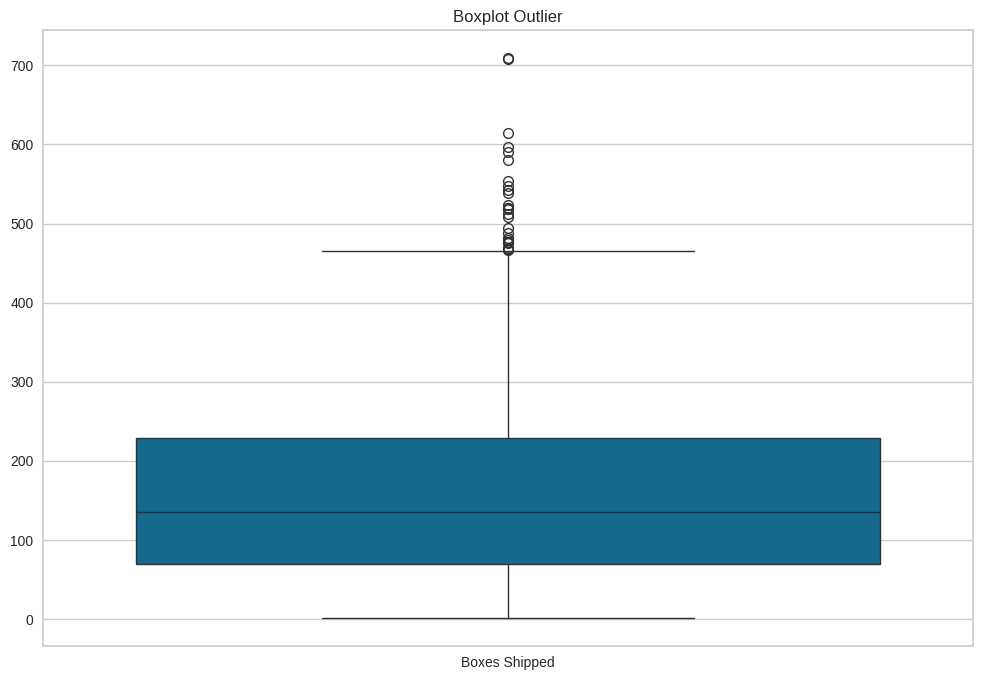

In [197]:
#  check missing value
plt.figure(figsize=(12, 8))
sns.boxplot(data=sales_data)
plt.title('Boxplot Outlier')
plt.show()

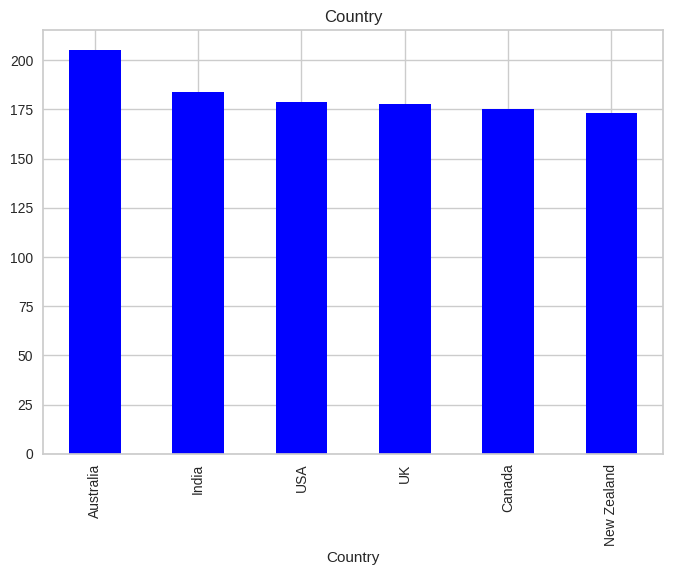

In [198]:
sales_data.Country.value_counts().plot(kind='bar',color='blue')
plt.title('Country')
plt.show()

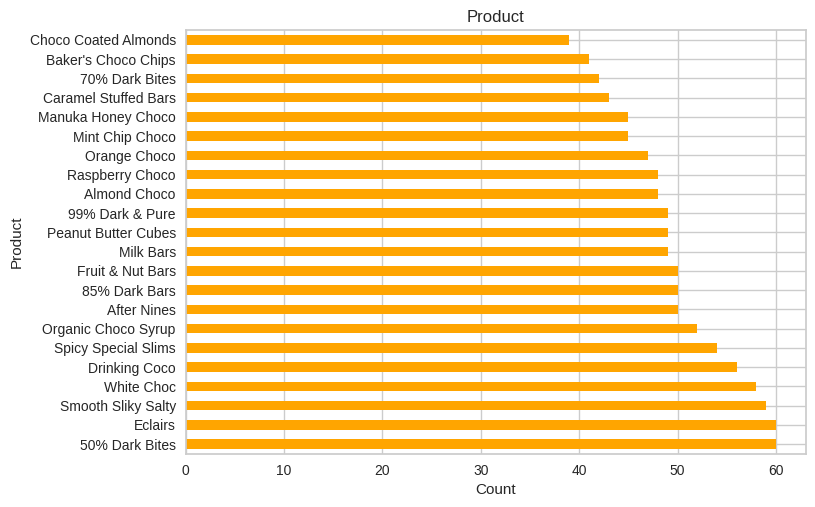

In [199]:
sales_data.Product.value_counts().plot(kind='barh',color='orange')
plt.title('Product')
plt.xlabel("Count")
plt.show()

## Feature Engineering

In [200]:
# menangani kolom tidak konsisten pada amount
sales_data['Amount'] = sales_data['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)
sales_data['Amount']

,Amount
0,5320.0
1,7896.0
2,4501.0
3,12726.0
4,13685.0
...,...
1089,4410.0
1090,6559.0
1091,574.0
1092,2086.0


In [201]:
# mengubah date --> datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['Date']

<ipython-input-201-734bc65f0670>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_data['Date'] = pd.to_datetime(sales_data['Date'])


,Date
0,2022-01-04
1,2022-08-01
2,2022-07-07
3,2022-04-27
4,2022-02-24
...,...
1089,2022-05-17
1090,2022-06-07
1091,2022-07-26
1092,2022-07-28


In [202]:
#harga per-Box
sales_data["Perbox_price"]=sales_data["Amount"]/sales_data["Boxes Shipped"]
sales_data["Perbox_price"]

,Perbox_price
0,29.555556
1,84.000000
2,49.461538
3,37.210526
4,74.375000
...,...
1089,13.653251
1090,55.117647
1091,2.645161
1092,5.432292


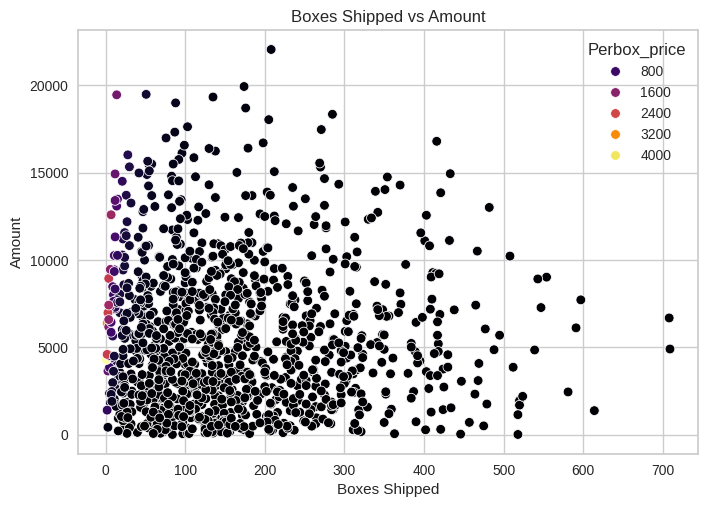

In [203]:
#korelasi scatter plot untuk amount dan boxes shipped
sns.scatterplot(x='Boxes Shipped',y='Amount',hue='Perbox_price',data=sales_data,palette='inferno')
plt.title('Boxes Shipped vs Amount')
plt.xlabel('Boxes Shipped')
plt.ylabel('Amount')
plt.show()

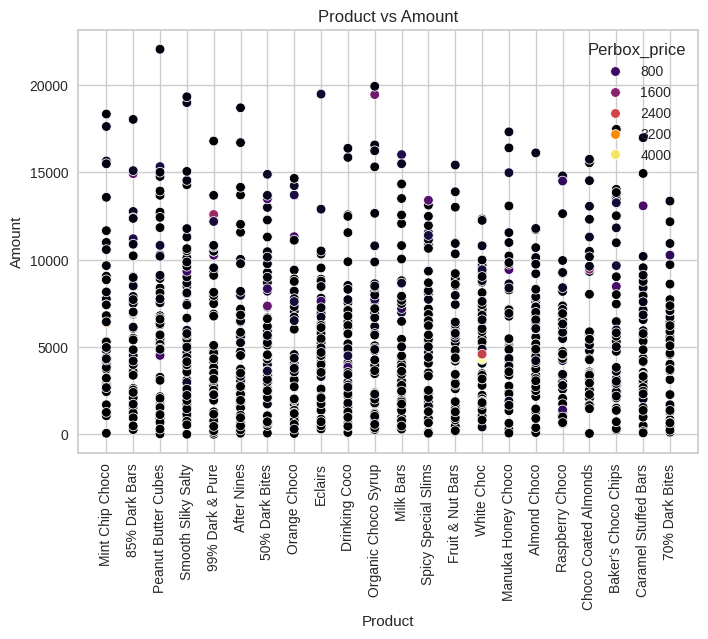

In [204]:
sns.scatterplot(x='Product',y='Amount',hue='Perbox_price',data=sales_data,palette='inferno')
plt.title('Product vs Amount')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.ylabel('Amount')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [205]:
sales_data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Perbox_price
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,29.555556
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,84.000000
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,49.461538
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,37.210526
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,74.375000
...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323,13.653251
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119,55.117647
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217,2.645161
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384,5.432292


In [206]:
sales_data.describe()

,Date,Amount,Boxes Shipped,Perbox_price
count,1094,1094.000000,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989,105.720204
min,2022-01-03 00:00:00,7.000000,1.000000,0.013514
25%,2022-03-02 00:00:00,2390.500000,70.000000,14.592563
50%,2022-05-11 00:00:00,4868.500000,135.000000,36.141844
75%,2022-07-04 00:00:00,8027.250000,228.750000,79.160357
max,2022-08-31 00:00:00,22050.000000,709.000000,4291.000000
std,NaN,4102.442014,121.544145,278.658429


In [207]:
# hapus outlier
num_col = sales_data.select_dtypes(include=[np.number]).columns
Q1 = sales_data[num_col].quantile(0.25)
Q3 = sales_data[num_col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = ((sales_data[num_col] < lower_bound) | (sales_data[num_col] > upper_bound)).any(axis=1)
sales_data = sales_data[~outlier_mask]
print('jumlah data setelah menghapus outlier: ', sales_data.shape[0])

jumlah data setelah menghapus outlier:  928


In [208]:
# melakukan scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(sales_data[num_col])

In [209]:
# Encoding categorical untuk 'Country' dan 'Product'
label_encoder_country = LabelEncoder()
sales_data['Country'] = label_encoder_country.fit_transform(sales_data['Country'])

label_encoder_product = LabelEncoder()
sales_data['Product'] = label_encoder_product.fit_transform(sales_data['Product'])

sales_data

<ipython-input-209-d4efc6e45f16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Country'] = label_encoder_country.fit_transform(sales_data['Country'])
<ipython-input-209-d4efc6e45f16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Product'] = label_encoder_product.fit_transform(sales_data['Product'])


,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Perbox_price
0,Jehu Rudeforth,4,14,2022-01-04,5320.0,180,29.555556
1,Van Tuxwell,2,2,2022-08-01,7896.0,94,84.000000
2,Gigi Bohling,2,17,2022-07-07,4501.0,91,49.461538
3,Jan Morforth,0,17,2022-04-27,12726.0,342,37.210526
4,Jehu Rudeforth,4,17,2022-02-24,13685.0,184,74.375000
...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,0,20,2022-05-17,4410.0,323,13.653251
1090,Jehu Rudeforth,5,21,2022-06-07,6559.0,119,55.117647
1091,Ches Bonnell,1,16,2022-07-26,574.0,217,2.645161
1092,Dotty Strutley,2,10,2022-07-28,2086.0,384,5.432292


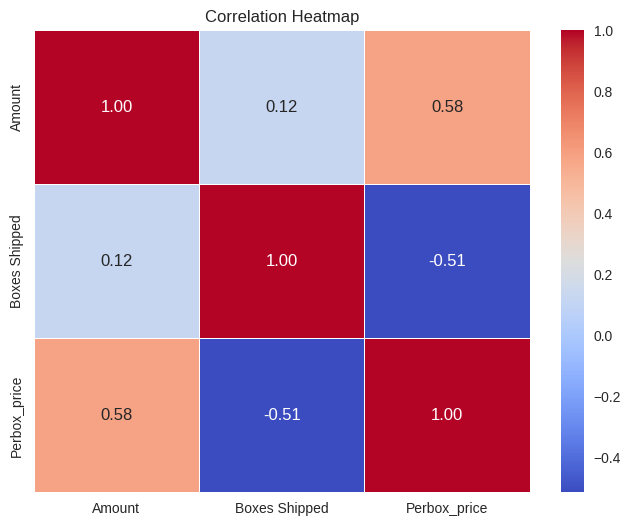

In [210]:
corr = sales_data[num_col].corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [212]:
# Mengambil kolom 'Annual Income (k$)' dan 'Spending Score (1-100)' dari dataset dan menyimpannya dalam array X
X = sales_data.iloc[:, [1,2,4,5,6]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Country','Product','Amount', 'Boxes Shipped','Perbox_price']))

     Country  Product   Amount  Boxes Shipped  Perbox_price
0        4.0     14.0   5320.0          180.0     29.555556
1        2.0      2.0   7896.0           94.0     84.000000
2        2.0     17.0   4501.0           91.0     49.461538
3        0.0     17.0  12726.0          342.0     37.210526
4        4.0     17.0  13685.0          184.0     74.375000
..       ...      ...      ...            ...           ...
923      0.0     20.0   4410.0          323.0     13.653251
924      5.0     21.0   6559.0          119.0     55.117647
925      1.0     16.0    574.0          217.0      2.645161
926      2.0     10.0   2086.0          384.0      5.432292
927      2.0      1.0   5075.0          344.0     14.752907

[928 rows x 5 columns]


In [213]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 4

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_Amount = cluster_data[:, 0].mean()  # Rata-rata Amount
        mean_Boxes_Shipped = cluster_data[:, 1].mean()  # Rata-rata jml box terjual
        mean_Perbox_price = cluster_data[:, 2].mean()  # Rata-rata jml harga perboxnya
        mean_Country = cluster_data[:, 3].mean()  # Rata-rata Country
        mean_Product = cluster_data[:, 4].mean()  # Rata-rata Product

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata pendapatan: {mean_Amount:.2f}")
        print(f"Rata-rata jumlah Box Terjual: {mean_Boxes_Shipped:.2f}")
        print(f"Rata-rata harga perbox: {mean_Perbox_price:.2f}")
        print(f"Rata-rata Country: {mean_Country:.2f}")
        print(f"Rata-rata Product: {mean_Product:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata pendapatan: 2.34
Rata-rata jumlah Box Terjual: 10.02
Rata-rata harga perbox: 4552.67
Rata-rata Country: 173.66
Rata-rata Product: 40.92

Cluster 2:
Rata-rata pendapatan: 2.56
Rata-rata jumlah Box Terjual: 10.63
Rata-rata harga perbox: 1524.48
Rata-rata Country: 152.65
Rata-rata Product: 18.73

Cluster 3:
Rata-rata pendapatan: 2.66
Rata-rata jumlah Box Terjual: 10.67
Rata-rata harga perbox: 12643.22
Rata-rata Country: 201.60
Rata-rata Product: 79.61

Cluster 4:
Rata-rata pendapatan: 2.33
Rata-rata jumlah Box Terjual: 11.39
Rata-rata harga perbox: 7980.61
Rata-rata Country: 176.97
Rata-rata Product: 62.02


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [214]:
# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.55


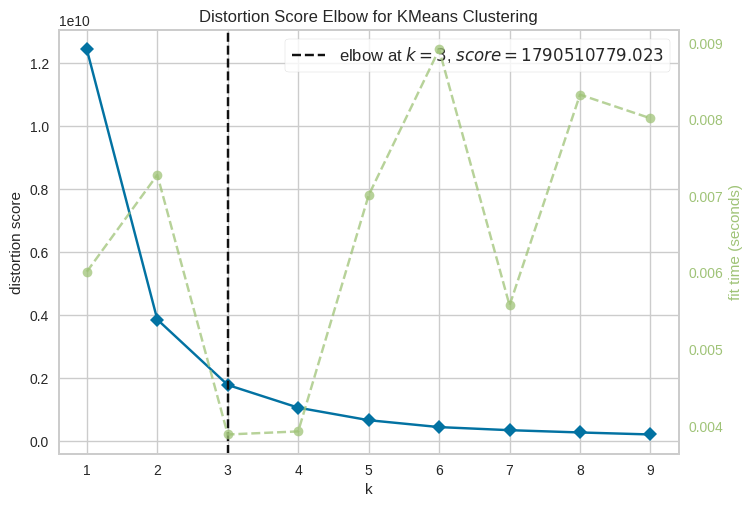

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [215]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(X)

visualizer.show()

In [216]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_Amount = cluster_data[:, 0].mean()  # Rata-rata Amount
        mean_Boxes_Shipped = cluster_data[:, 1].mean()  # Rata-rata jml box terjual
        mean_Perbox_price = cluster_data[:, 2].mean()  # Rata-rata jml harga perboxnya
        mean_Country = cluster_data[:, 3].mean()  # Rata-rata Country
        mean_Product = cluster_data[:, 4].mean()  # Rata-rata Product

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata pendapatan: {mean_Amount:.2f}")
        print(f"Rata-rata jumlah Box Terjual: {mean_Boxes_Shipped:.2f}")
        print(f"Rata-rata harga perbox: {mean_Perbox_price:.2f}")
        print(f"Rata-rata Country: {mean_Country:.2f}")
        print(f"Rata-rata Product: {mean_Product:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)
# evaluasi
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata pendapatan: 2.42
Rata-rata jumlah Box Terjual: 10.90
Rata-rata harga perbox: 6038.55
Rata-rata Country: 173.40
Rata-rata Product: 51.42

Cluster 2:
Rata-rata pendapatan: 2.44
Rata-rata jumlah Box Terjual: 10.39
Rata-rata harga perbox: 1935.20
Rata-rata Country: 158.64
Rata-rata Product: 21.12

Cluster 3:
Rata-rata pendapatan: 2.53
Rata-rata jumlah Box Terjual: 10.66
Rata-rata harga perbox: 11282.16
Rata-rata Country: 190.81
Rata-rata Product: 75.38
Silhouette Score: 0.58


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [217]:
mutual_info = mutual_info_regression(X, labels)

# Menyusun hasil dalam DataFrame
feature_importance = pd.DataFrame({
    'Feature': ['Country','Product','Amount', 'Boxes Shipped','Perbox_price'],
    'Importance': mutual_info
}).sort_values(by='Importance', ascending=False)

# Tampilkan fitur yang paling berpengaruh
print("Fitur yang paling berpengaruh terhadap clustering:")
print(feature_importance)


Fitur yang paling berpengaruh terhadap clustering:
         Feature  Importance
2         Amount    1.024553
4   Perbox_price    0.280221
3  Boxes Shipped    0.043521
1        Product    0.027971
0        Country    0.000000


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata pendapatan penjualan: 9196.59
Rata-rata jumlah Box Terjual: 182.00
Rata-rata harga perbox: 67.00

Cluster 2:
Rata-rata pendapatan penjualan: 2835.03
Rata-rata jumlah Box Terjual: 162.99
Rata-rata harga perbox: 28.05

Silhouette Score: 0.61


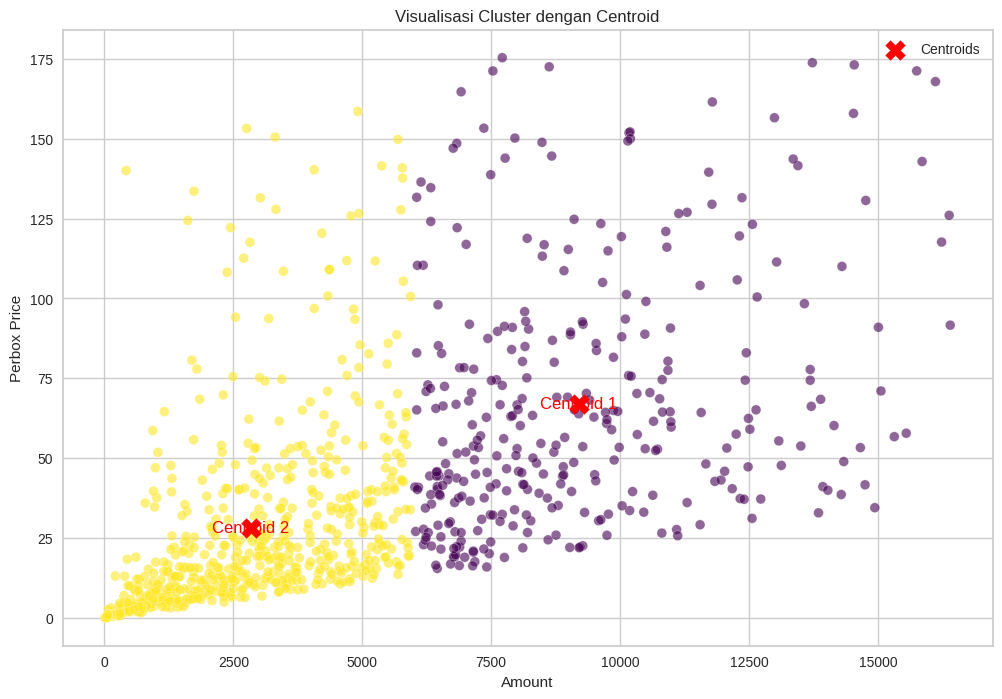


Nilai Centroids:
Centroid 1: Amount = 9196.59, Boxes Shipped = 182.00, Perbox Price = 67.00
Centroid 2: Amount = 2835.03, Boxes Shipped = 162.99, Perbox Price = 28.05


In [218]:
# Mengambil data untuk clustering
X = sales_data[['Amount', 'Boxes Shipped', 'Perbox_price']].values

# KMeans Clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster dan centroid
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_Amount = cluster_data[:, 0].mean()
        mean_Boxes_Shipped = cluster_data[:, 1].mean()
        mean_Perbox_price = cluster_data[:, 2].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata pendapatan penjualan: {mean_Amount:.2f}")
        print(f"Rata-rata jumlah Box Terjual: {mean_Boxes_Shipped:.2f}")
        print(f"Rata-rata harga perbox: {mean_Perbox_price:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

# Evaluasi menggunakan Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"\nSilhouette Score: {silhouette_avg:.2f}")

# Visualisasi hasil clustering (Amount vs Perbox Price)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 2], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[2], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Amount')
plt.ylabel('Perbox Price')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("\nNilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Amount = {centroid[0]:.2f}, Boxes Shipped = {centroid[1]:.2f}, Perbox Price = {centroid[2]:.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [219]:
# Menambahkan hasil label cluster ke dalam DataFrame asli
sales_data['Cluster'] = kmeans.labels_

# Menampilkan DataFrame dengan label cluster
sales_data.head()

<ipython-input-219-289db4227a7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Cluster'] = kmeans.labels_


,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Perbox_price,Cluster
0,Jehu Rudeforth,4,14,2022-01-04,5320.0,180,29.555556,1
1,Van Tuxwell,2,2,2022-08-01,7896.0,94,84.000000,0
2,Gigi Bohling,2,17,2022-07-07,4501.0,91,49.461538,1
3,Jan Morforth,0,17,2022-04-27,12726.0,342,37.210526,0
4,Jehu Rudeforth,4,17,2022-02-24,13685.0,184,74.375000,0


In [220]:
# Melakukan inverse transform pada fitur 'Country' dan 'Product'
sales_data['Country'] = label_encoder_country.inverse_transform(sales_data['Country'])
sales_data['Product'] = label_encoder_product.inverse_transform(sales_data['Product'])

# Menampilkan hasil setelah inverse transform
print(sales_data.head())

     Sales Person    Country              Product       Date   Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco 2022-01-04   5320.0   
1     Van Tuxwell      India        85% Dark Bars 2022-08-01   7896.0   
2    Gigi Bohling      India  Peanut Butter Cubes 2022-07-07   4501.0   
3    Jan Morforth  Australia  Peanut Butter Cubes 2022-04-27  12726.0   
4  Jehu Rudeforth         UK  Peanut Butter Cubes 2022-02-24  13685.0   

   Boxes Shipped  Perbox_price  Cluster  
0            180     29.555556        1  
1             94     84.000000        0  
2             91     49.461538        1  
3            342     37.210526        0  
4            184     74.375000        0  


<ipython-input-220-c931dc4cc1ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Country'] = label_encoder_country.inverse_transform(sales_data['Country'])
<ipython-input-220-c931dc4cc1ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Product'] = label_encoder_product.inverse_transform(sales_data['Product'])


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [221]:
# inverse transform data yang telah di standarisasi
sales_data[num_col] = scaler.inverse_transform(df_scaled)

# Menampilkan hasil setelah dikembalikan ke skala asli
print(sales_data[num_col].head())

    Amount  Boxes Shipped  Perbox_price
0   5320.0          180.0     29.555556
1   7896.0           94.0     84.000000
2   4501.0           91.0     49.461538
3  12726.0          342.0     37.210526
4  13685.0          184.0     74.375000


<ipython-input-221-d77cbff9ed27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data[num_col] = scaler.inverse_transform(df_scaled)


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [222]:
sales_data.info()
sales_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 0 to 1093
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   928 non-null    object        
 1   Country        928 non-null    object        
 2   Product        928 non-null    object        
 3   Date           928 non-null    datetime64[ns]
 4   Amount         928 non-null    float64       
 5   Boxes Shipped  928 non-null    float64       
 6   Perbox_price   928 non-null    float64       
 7   Cluster        928 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 61.6+ KB


,Date,Amount,Boxes Shipped,Perbox_price,Cluster
count,928,928.000000,928.000000,928.000000,928.000000
mean,2022-05-03 04:37:45.517241600,5076.659483,169.688578,41.775999,0.647629
min,2022-01-03 00:00:00,7.000000,3.000000,0.062780,0.000000
25%,2022-03-02 00:00:00,2154.250000,90.750000,13.327060,0.000000
50%,2022-05-11 00:00:00,4392.500000,146.000000,30.299053,1.000000
75%,2022-07-04 00:00:00,7299.250000,234.250000,56.790538,1.000000
max,2022-08-31 00:00:00,16401.000000,465.000000,175.318182,1.000000
std,NaN,3661.367472,102.983116,38.090506,0.477966


Interpretasi Hail Clustering model K-means

1. Cluster 1:

* Rata-rata pendapatan penjualan: 9196.59
* Rata-rata jumlah Box Terjual: 182.00
* Rata-rata harga perbox: 67.00
* Analisis: Cluster ini menunjukkan penjualan produk dg harga per box tinggi dan jumlah penjualan besar. oleh sebab itu, cluster ini memiliki pendaatan penjualan yang sangat tinggi. memungkinkan marketing penjualan yang cukup baik

2. Cluster 2:

* Rata-rata pendapatan penjualan: 2835.03
* Rata-rata jumlah Box Terjual: 162.99
* Rata-rata harga perbox: 28.05
* Analisis: Cluster ini mencerminkan pendapatan penjulan rendah. meskipun penjualan cukup tinggi dan Harga per box juga lebih murah daripada cluster 1. kemungkinan sales memikirkan mendapat jumlah penjualan tinggi tapi kurang dalam menghasilkan pendapatan penjualan



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [224]:
# save hasil klasterisasi
sales_data.to_csv('sales_chocolate_cluster.csv', index=False)